In [57]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [58]:
def read_images(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, target_size)  # Redimensionar imagen
            img = img.astype(np.float32) / 255.0  # Normalizar imagen
            images.append(img)
    return images

In [59]:
def flatten_images(images):
    flattened_images = np.array([img.flatten() for img in images])
    return flattened_images

In [60]:
def perform_pca(images, num_components):
    pca = PCA(n_components=num_components)
    pca.fit(images)
    return pca

In [61]:
def print_component_matrices(pca):
    print("Matriz de cada componente:")
    for i, component in enumerate(pca.components_):
        print(f"Componente {i+1}:")
        print(component)
        print()

In [62]:
def print_eigenvalues(pca):
    print("Eigenvalues:")
    print(pca.explained_variance_)
    print()

def print_explained_variance(pca):
    print("Explained variance:")
    print(pca.explained_variance_ratio_)
    print()

def print_loadings(pca):
    print("Loadings:")
    print(pca.components_.T * np.sqrt(pca.explained_variance_))
    print()

def plot_eigenvalues(pca):
    plt.plot(pca.explained_variance_)
    plt.xlabel('Component number')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues')
    plt.show()

def plot_explained_variance(pca):
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Component number')
    plt.ylabel('Explained variance')
    plt.title('Explained variance')
    plt.show()

def plot_loadings(pca):
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    plt.plot(loadings)
    plt.xlabel('Feature number')
    plt.ylabel('Loading')
    plt.title('Loadings')
    plt.show()

def plot_pca_scatter(pca, images, labels):
    reduced_images = pca.transform(images)
    plt.scatter(reduced_images[:, 0], reduced_images[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Scatter Plot')
    plt.colorbar(label='Cluster')
    plt.show()

def plot_pca_scatter_3d(pca, images, labels):
    reduced_images = pca.transform(images)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=labels, cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('PCA Scatter Plot')
    fig.colorbar(scatter, label='Cluster')
    plt.show()


In [63]:
def plot_image_reconstruction(pca, images, num_components_to_keep=50):
    reconstructed_images = pca.inverse_transform(pca.transform(flatten_images(images)))
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(reconstructed_images[i].reshape(images[0].shape), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Num Componentes: {num_components_to_keep}')
    plt.show()

Eigenvalues:
[170.96591    24.94036     7.5632358   6.215411    5.5745378   3.3239698
   2.5190406]

Explained variance:
[0.44148782 0.06440386 0.01953066 0.01605015 0.01439521 0.00858354
 0.00650496]

Loadings:
[[-0.02509019 -0.05820189  0.03464471 ...  0.02455444  0.02074699
  -0.00915767]
 [-0.03069166 -0.06319694  0.03318925 ...  0.01501783  0.01608153
  -0.02323198]
 [-0.03309239 -0.05958595  0.0301987  ...  0.01244543  0.02223525
  -0.02287834]
 ...
 [-0.08240517 -0.11952613  0.0057652  ... -0.04136718  0.00180987
  -0.03832132]
 [-0.07514494 -0.12229643  0.02951022 ... -0.01987104 -0.02229343
  -0.04999668]
 [-0.0499232  -0.10953339  0.06690945 ...  0.0485406   0.03279698
  -0.00880288]]



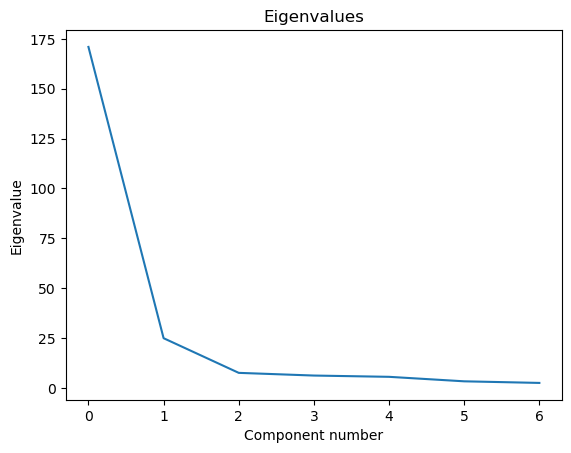

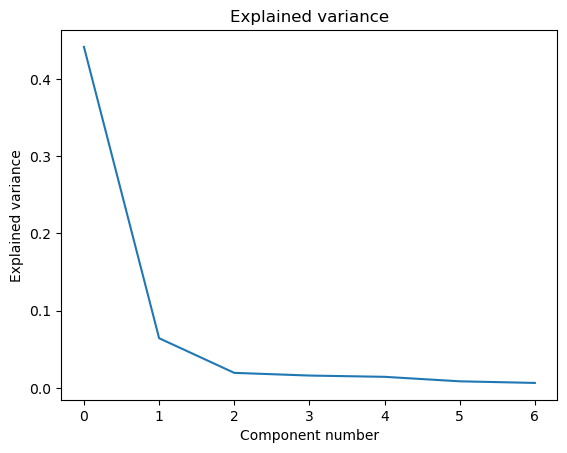

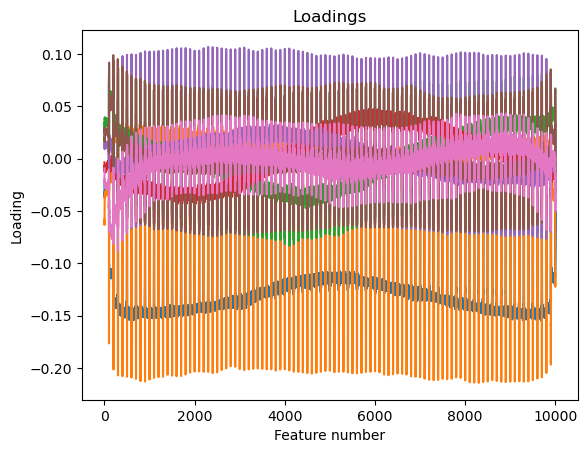

In [64]:
folder = './images'

images = read_images(folder)

flattened_images = flatten_images(images)

num_components = 7  # Elegi 7 ya que es la varianza explicada a partir de este numero no mejora significativamente teniendo mas comoponentes
pca = perform_pca(flattened_images, num_components)

print_eigenvalues(pca)
print_explained_variance(pca)
print_loadings(pca)
plot_eigenvalues(pca)
plot_explained_variance(pca)
plot_loadings(pca)

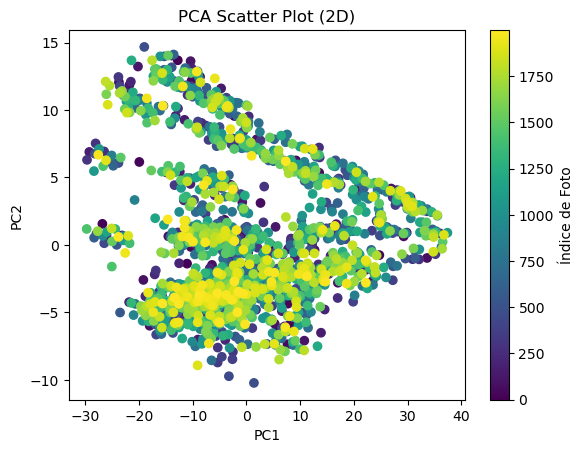

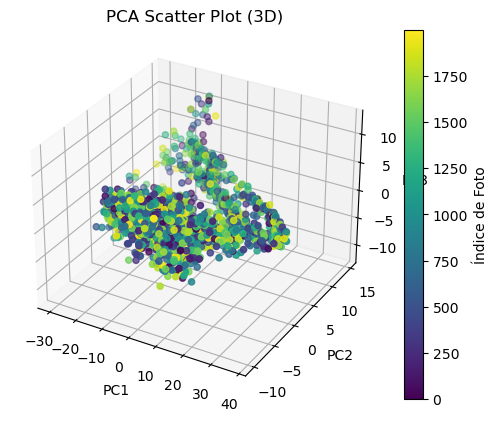

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_scatter(pca, images, labels, num_dimensions=2):
    reduced_images = pca.transform(images)
    if num_dimensions == 2:
        plt.scatter(reduced_images[:, 0], reduced_images[:, 1], c=labels, cmap='viridis')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('PCA Scatter Plot (2D)')
        plt.colorbar(label='Índice de Foto')
        plt.show()
    elif num_dimensions == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=labels, cmap='viridis')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.set_title('PCA Scatter Plot (3D)')
        plt.colorbar(scatter, label='Índice de Foto')  # Aquí pasamos el objeto scatter
        plt.show()
    else:
        print("Número de dimensiones no válido. Solo se admiten 2D y 3D.")

# Ejemplo de uso:
plot_pca_scatter(pca, flattened_images, range(len(flattened_images)), num_dimensions=2)  # Plot 2D
plot_pca_scatter(pca, flattened_images, range(len(flattened_images)), num_dimensions=3)  # Plot 3D